# Time Series Analysis

## This script contains the following points:
### 1. Importing Libaries and Data
### 2. Subsetting, Wrangling, and Cleaning Data
### 3. Decomposition
### 4. Testing for Stationary
### 5. Stationarizing Data

## 1. Import Libaries and Data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

# Disable deprecation warnings
warnings.filterwarnings('ignore')

# Styling options for plots appearance
plt.style.use('fivethirtyeight')

In [3]:
# Import data
path = r'C:\Users\nguye\OneDrive\05-2023 US Mass Shooting Data Analysis'
#path = r'/Users/poochies/Library/CloudStorage/OneDrive-Personal/05-2023 US Mass Shooting Data Analysis'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Mass_Shootings_GA.csv'))

## 2. Subsetting, Wrangling, and Cleaning Data

The time series analysis will be conducted on the total count of mass shooting incidents by month/year. 

In [4]:
df.head()

,Unnamed: 0,Incident ID,Incident Date,State,City Or County,Victims Injured,Victims Killed,Total Victims,Suspects Injured,Suspects Killed,Suspects Arrested,Total Suspects,Suspect Category
0,0,2589765,"May 6, 2023",Ohio,Columbus,3,1,4,1,0,0,1,Single suspect
1,1,2589804,"May 5, 2023",Mississippi,Natchez,2,2,4,0,0,0,0,No suspects
2,2,2589790,"May 5, 2023",Mississippi,Vicksburg,4,0,4,0,0,0,0,No suspects
3,3,2589699,"May 5, 2023",Mississippi,Ocean Springs,5,1,6,0,0,0,0,No suspects
4,4,2587918,"May 3, 2023",Illinois,Chicago,4,0,4,0,0,0,0,No suspects


In [5]:
# Create a new column showing the count for each 'Incident Date'
df['Incident Count'] = df.groupby('Incident Date')['Incident Date'].transform('count')

In [6]:
df.head()

,Unnamed: 0,Incident ID,Incident Date,State,City Or County,Victims Injured,Victims Killed,Total Victims,Suspects Injured,Suspects Killed,Suspects Arrested,Total Suspects,Suspect Category,Incident Count
0,0,2589765,"May 6, 2023",Ohio,Columbus,3,1,4,1,0,0,1,Single suspect,1
1,1,2589804,"May 5, 2023",Mississippi,Natchez,2,2,4,0,0,0,0,No suspects,3
2,2,2589790,"May 5, 2023",Mississippi,Vicksburg,4,0,4,0,0,0,0,No suspects,3
3,3,2589699,"May 5, 2023",Mississippi,Ocean Springs,5,1,6,0,0,0,0,No suspects,3
4,4,2587918,"May 3, 2023",Illinois,Chicago,4,0,4,0,0,0,0,No suspects,2


In [7]:
# Create a new dataframe with just the 'Incident Date' and 'Incident Count'
df_2 = df[['Incident Date', 'Incident Count']]

In [8]:
df_2.head()

,Incident Date,Incident Count
0,"May 6, 2023",1
1,"May 5, 2023",3
2,"May 5, 2023",3
3,"May 5, 2023",3
4,"May 3, 2023",2


In [9]:
df_2.shape

(4232, 2)

In [10]:
# Check for duplicates
dups = df_2.duplicated()
dups.sum()

2130

In [11]:
# Remove duplicates
df_clean = df_2.drop_duplicates()

In [12]:
df_clean.shape

(2102, 2)

In [13]:
# Convert 'Incident Date' to datetime format
df_clean['Incident Date'] = pd.to_datetime(df_clean['Incident Date'])

In [14]:
df_clean.head()

,Incident Date,Incident Count
0,2023-05-06,1
1,2023-05-05,3
4,2023-05-03,2
6,2023-05-02,3
9,2023-04-30,11


Because each month does not have an incident for each day, incident counts will be combined by month/year

In [15]:
# Create a 'Month/Year' column
df_clean['Month'] = df_clean['Incident Date'].dt.month
df_clean['Year'] = df_clean['Incident Date'].dt.year

In [16]:
df_clean.head()

,Incident Date,Incident Count,Month,Year
0,2023-05-06,1,5,2023
1,2023-05-05,3,5,2023
4,2023-05-03,2,5,2023
6,2023-05-02,3,5,2023
9,2023-04-30,11,4,2023


In [17]:
# Create a new column showing count for each month/year
df_clean['Mass Shootings'] = df_clean.groupby(['Month', 'Year'])['Incident Count'].transform('sum')

In [18]:
df_clean.head()

,Incident Date,Incident Count,Month,Year,Mass Shootings
0,2023-05-06,1,5,2023,9
1,2023-05-05,3,5,2023,9
4,2023-05-03,2,5,2023,9
6,2023-05-02,3,5,2023,9
9,2023-04-30,11,4,2023,56


In [19]:
# Create a new column with the month/year combined
df_clean['Date'] = pd.to_datetime(df_clean[['Year', 'Month']].assign(DAY = 1))
df_clean.head()

,Incident Date,Incident Count,Month,Year,Mass Shootings,Date
0,2023-05-06,1,5,2023,9,2023-05-01
1,2023-05-05,3,5,2023,9,2023-05-01
4,2023-05-03,2,5,2023,9,2023-05-01
6,2023-05-02,3,5,2023,9,2023-05-01
9,2023-04-30,11,4,2023,56,2023-04-01


In [20]:
# Remove columns
df_clean = df_clean.drop(columns = ['Incident Date', 'Incident Count', 'Month', 'Year'])
df_clean.head()

,Mass Shootings,Date
0,9,2023-05-01
1,9,2023-05-01
4,9,2023-05-01
6,9,2023-05-01
9,56,2023-04-01


In [21]:
# Check for duplicates
dups_2 = df_clean.duplicated()
dups_2.sum()

1989

In [22]:
df_clean.shape

(2102, 2)

In [23]:
df_3 = df_clean.drop_duplicates()

In [24]:
df_3.shape

(113, 2)

In [25]:
# Check for missing values
df_3.isnull().sum()

Mass Shootings    0
Date              0
dtype: int64

In [26]:
df_3.head()

,Mass Shootings,Date
0,9,2023-05-01
9,56,2023-04-01
65,39,2023-03-01
104,40,2023-02-01
144,52,2023-01-01


In [27]:
# To conduct a time series analysis, the current year's data will be removed
df_sub = df_3.loc[(df_3['Date'] >= '2014-01-01') & (df_3['Date'] < '2023-01-01')]

In [28]:
df_sub.head()

,Mass Shootings,Date
196,30,2022-12-01
226,43,2022-11-01
269,62,2022-10-01
331,63,2022-09-01
394,62,2022-08-01


In [29]:
df_sub.shape

(108, 2)

### Subset Reasoning

In order to conduct the time series analysis, I had to take into account the time period of my dataset. There were multiple mass shootings that occured on the same day, but there was not an incident for every day of each of the month. What was common was that there were multiple incidents that occurred in a month. Therefore, I combined my data to reflect the number of incidents that occurred monthly from 2014 to 2022. I had data for the current year (2023), but this could not be utilized in the time series analysis because it would be considred forcasted data. 

In [30]:
# Set the 'Date' as the index
from datetime import datetime
df_sub['datetime'] = pd.to_datetime(df_sub['Date'])
df_sub = df_sub.set_index('datetime')
df_sub.drop(['Date'], axis = 1, inplace = True)
df_sub.head()

,Mass Shootings
datetime,
2022-12-01,30
2022-11-01,43
2022-10-01,62
2022-09-01,63
2022-08-01,62


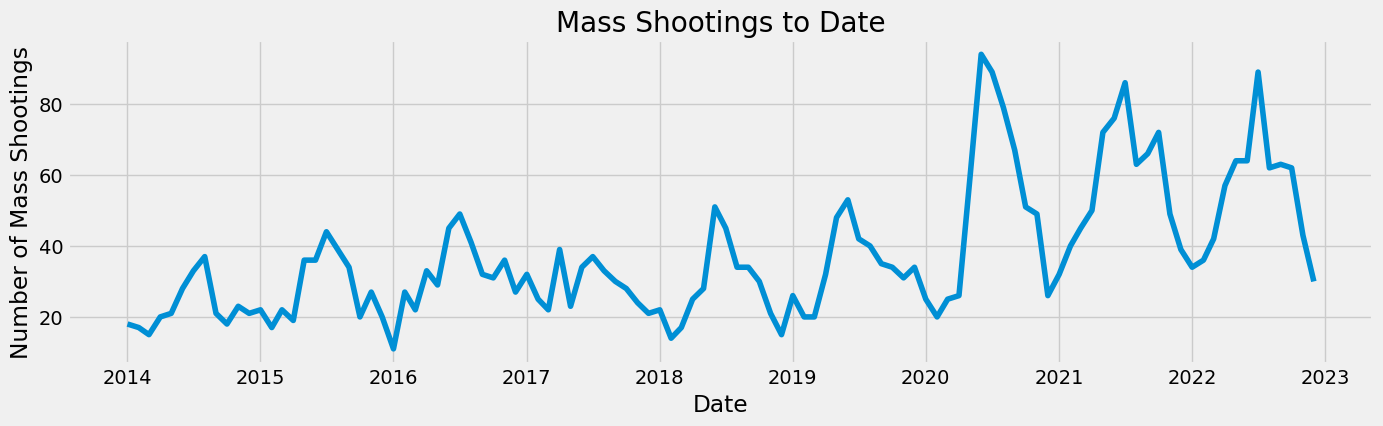

In [31]:
# Plot new dataset
plt.figure(figsize = (15, 4), dpi = 100)
plt.title('Mass Shootings to Date')
plt.xlabel('Date')
plt.ylabel('Number of Mass Shootings')
plt.plot(df_sub)

## 3. Decomposition

In [32]:
# Decompose the time series using additive model by monthly frequency
decomposition = sm.tsa.seasonal_decompose(df_sub.asfreq('MS'), model = 'additive')

In [33]:
# Define a fixed size for all charts
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

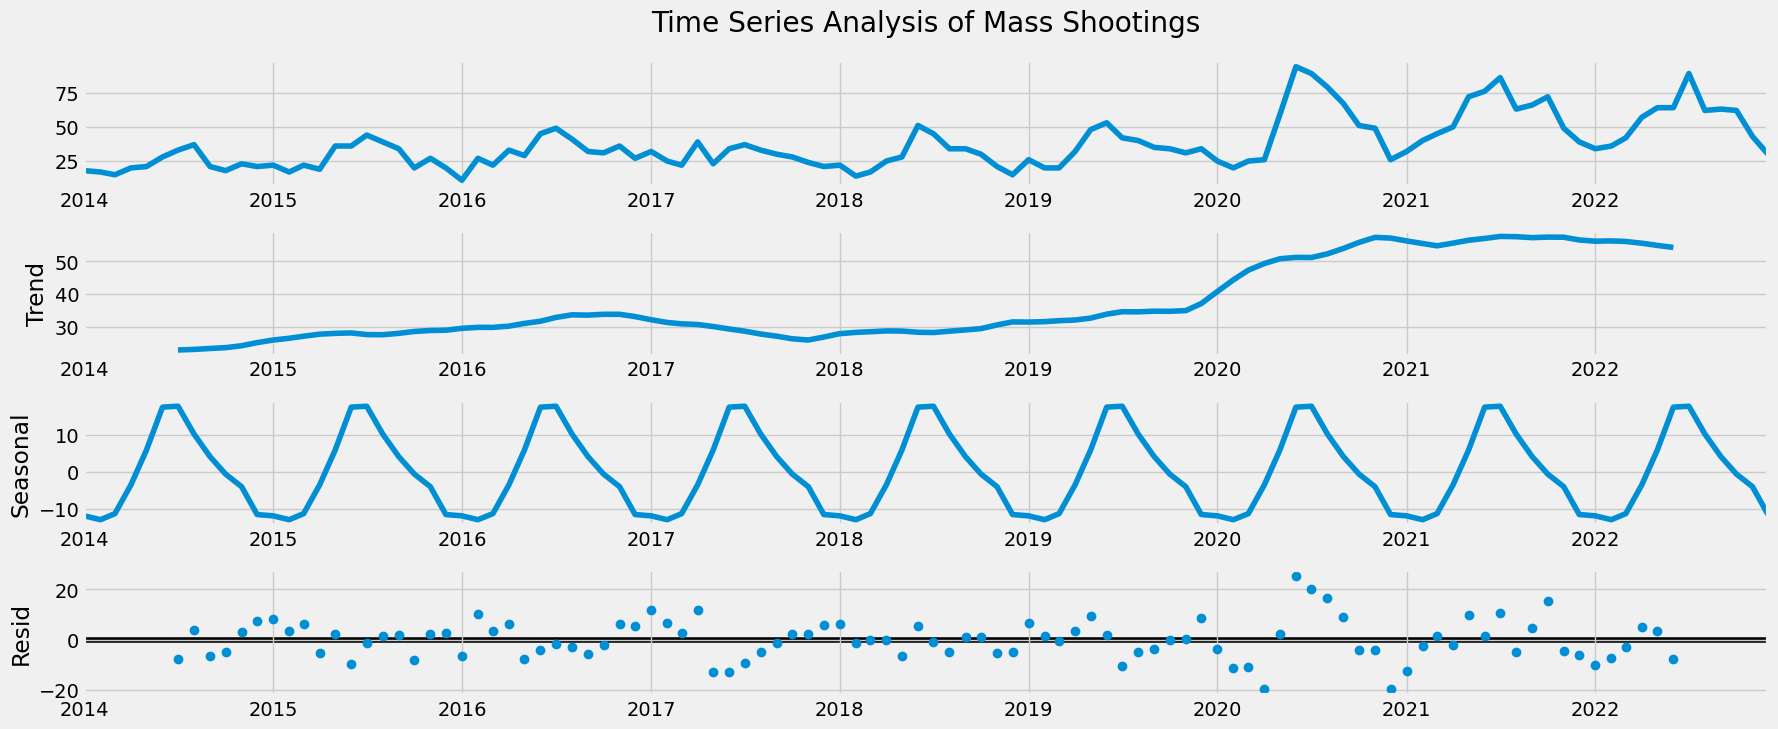

In [48]:
# Plot the separate components
decomposition.plot()
plt.title('Time Series Analysis of Mass Shootings', y = 5.25)
plt.show()

Because I'm working with unsmooth data, the level and trend are vastly different from each other. The trend shows some minor fluctuations in the data, but after 2019, the line gradually increases. This shows that the amount of mass shootings has increased at a steady rate. In the seasonality component, there are some seasonal fluctuations, which is based during the summer months. There is a lot of noise within the data, as is shown in the fourth component 'residual'. 

## 4. Testing for Stationary

In [35]:
# Import adfuller() function
from statsmodels.tsa.stattools import adfuller

# Create a Dickey-Fuller test function to perform test
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationary Test')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistics', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)
    
# Apply test to dataset
dickey_fuller(df_sub['Mass Shootings'])

Dickey-Fuller Stationary Test
Test Statistics                -0.784538
p-value                         0.823622
Number of Lags Used            11.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


### Hypothesis
Null: There is a unit root
Alternate: There is no unit root

Here the test statistic is larger than the critical value at 5%, this means that I cannot reject the null hypothesis and that there is a unit root within the data, which therfore indicates that my data is non-stationary. 

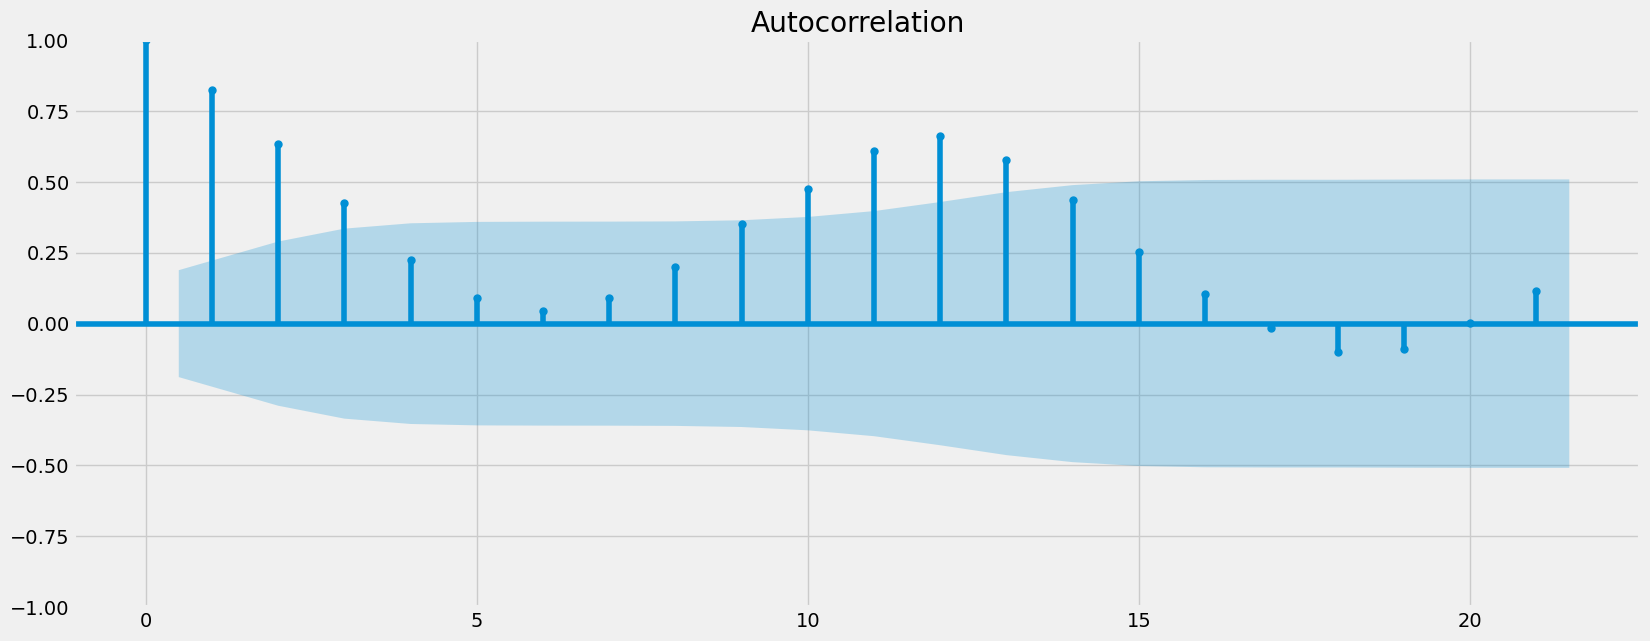

In [36]:
# Check plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_sub)
plt.show()

## 5. Stationarizing Data

In [37]:
# Differencing data
df_diff = df_sub - df_sub.shift(1)

In [38]:
# Remove missing values from results of differencing
df_diff.dropna(inplace = True)

In [39]:
df_diff.head()

,Mass Shootings
datetime,
2022-11-01,13.0
2022-10-01,19.0
2022-09-01,1.0
2022-08-01,-1.0
2022-07-01,27.0


In [40]:
df_diff.columns

Index(['Mass Shootings'], dtype='object')

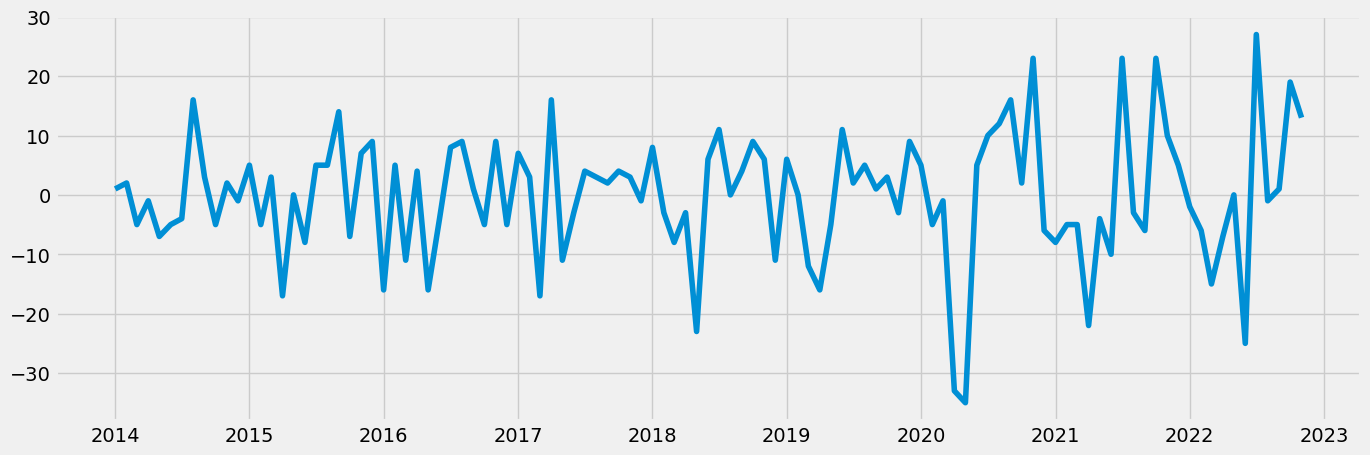

In [41]:
# Check time series curve after differencing
plt.figure(figsize = (15, 5), dpi = 100)
plt.plot(df_diff)

In [42]:
# Perform Dickey-Fuller test on differenced data
dickey_fuller(df_diff)

Dickey-Fuller Stationary Test
Test Statistics               -7.342162e+00
p-value                        1.058226e-10
Number of Lags Used            1.000000e+01
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64


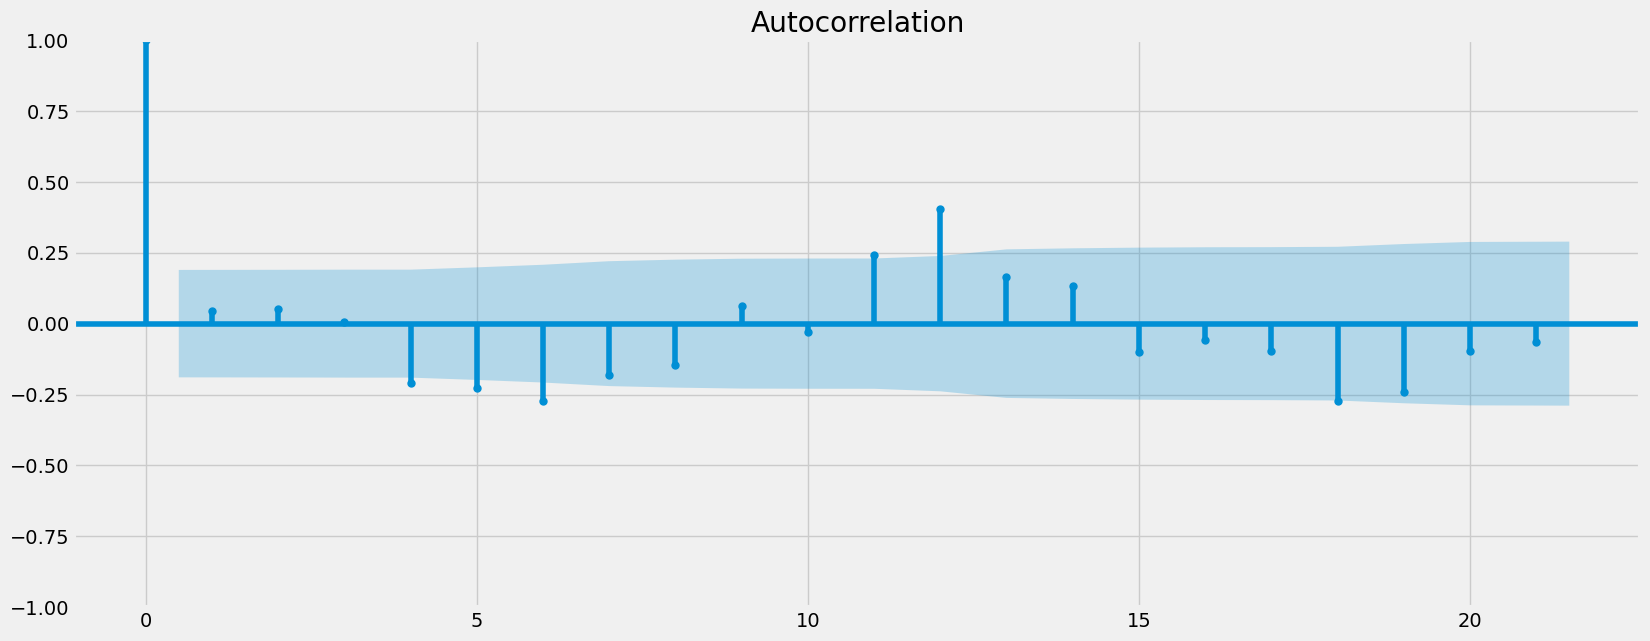

In [43]:
plot_acf(df_diff)
plt.show()